**Лекция 7**

# Сингулярное разложение матриц #

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Преобразования-$\mathbf{A^\top-A}$-и-$\mathbf{A-A^\top}$" data-toc-modified-id="Преобразования-$\mathbf{A^\top-A}$-и-$\mathbf{A-A^\top}$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Преобразования $\mathbf{A^\top A}$ и $\mathbf{A A^\top}$</a></span></li><li><span><a href="#Сингулярные-базисы,-сингулярное-разложение" data-toc-modified-id="Сингулярные-базисы,-сингулярное-разложение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сингулярные базисы, сингулярное разложение</a></span></li><li><span><a href="#Геометрический-смысл" data-toc-modified-id="Геометрический-смысл-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Геометрический смысл</a></span><ul class="toc-item"><li><span><a href="#Спектральное-разложение" data-toc-modified-id="Спектральное-разложение-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Спектральное разложение</a></span></li><li><span><a href="#Сингулярное-разложение" data-toc-modified-id="Сингулярное-разложение-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сингулярное разложение</a></span></li></ul></li><li><span><a href="#Малоранговые-аппроксимации-матриц" data-toc-modified-id="Малоранговые-аппроксимации-матриц-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Малоранговые аппроксимации матриц</a></span><ul class="toc-item"><li><span><a href="#Нормы-векторов" data-toc-modified-id="Нормы-векторов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Нормы векторов</a></span></li><li><span><a href="#Нормы-матриц" data-toc-modified-id="Нормы-матриц-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Нормы матриц</a></span></li><li><span><a href="#Теорема-Эккарта-—-Янга" data-toc-modified-id="Теорема-Эккарта-—-Янга-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Теорема Эккарта — Янга</a></span></li></ul></li><li><span><a href="#Метод-главных-компонент" data-toc-modified-id="Метод-главных-компонент-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Метод главных компонент</a></span><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Связь-с-сингулярным-разложением" data-toc-modified-id="Связь-с-сингулярным-разложением-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Связь с сингулярным разложением</a></span></li><li><span><a href="#Эффективная-размерность" data-toc-modified-id="Эффективная-размерность-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Эффективная размерность</a></span></li></ul></li><li><span><a href="#Примеры" data-toc-modified-id="Примеры-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Примеры</a></span><ul class="toc-item"><li><span><a href="#Dimension-reduction:-аппроксимации-изображений" data-toc-modified-id="Dimension-reduction:-аппроксимации-изображений-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Dimension reduction: аппроксимации изображений</a></span></li></ul></li><li><span><a href="#Источники" data-toc-modified-id="Источники-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import sys
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
# Styles
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

---

## Постановка задачи ##

В прошлый раз мы увидели: некоторые квадратные матрицы могут быть представлены в виде $A = S \Lambda S^\top$.
Наилучшие представители квадратных матриц &mdash; симметричные матрицы &mdash; представимы в виде $A = Q \Lambda Q^\top$ ($Q$ &mdash; ортогональная матрица). \
Но как быть, если матрица недиагонализируема? И как быть, если матрица даже не квадратная?

Рассмотрим матрицу $A$ размерностью $m \times n$. \
Соответствующий ей линейный оператор переводит вектор $\mathbf{x}$ из $\mathbb{R}^n$ в $\mathbb{R}^m$.
Поэтому теперь нам потребуется два ортонормированных базиса &laquo;собственных&raquo; (на самом деле *сингулярных*) векторов $\mathbf{v}_1, \ldots, \mathbf{v}_n$ из $\mathbb{R}^n$ и $\mathbf{u}_1, \ldots, \mathbf{u}_m$ из $\mathbb{R}^m$.
И мы будем искать решение уравнения $A\mathbf{v} = \sigma \mathbf{u}$.

Или в матричном виде

$$ A V = U \Sigma $$
и
$$ A = U \Sigma V^\top. $$

---

## Преобразования $\mathbf{A^\top A}$ и $\mathbf{A A^\top}$ ##

Рассмотрим преобразования $A^\top A$ и $A A^\top$.
Сначала повторим то, что уже знаем о них:

1. Ядро преобразования $A^\top A$ совпадает с ядром отображения $A$, а образ $A^\top A$ &mdash; с образом отображения $A^\top$.
1. Ранги матриц $A$, $A^\top$, $A^\top A$ и $AA^\top$ равны.
1. Матрицы $A^\top A$ и $A A^\top$ симметричные и неотрицательно определённые (все собственные значения $\lambda_i \ge 0$).

**Предложение.** Если $\mathbf{x}$ &mdash; собственный вектор преобразования $A^\top A$, принадлежащий собственному значения $\lambda \ne 0$, то $A(\mathbf{x})$ &mdash; собственный вектор преобразования $A A^\top$, принадлежащий тому же собственному значению. При этом линейно независимым собственным векторам $\mathbf{x}_1, \ldots, \mathbf{x}_s$ преобразования $A^\top A$ соответствуют линейно независимые собственные векторы $A(\mathbf{x}_1), \ldots, A(\mathbf{x}_s)$ преобразования $A A^\top$.  
**Доказательство.** Пусть $A^\top A (\mathbf{x}) = \lambda \mathbf{x}$. Подействует отображением $A$ на обе части этого равенства: $(A A^\top) A(\mathbf{x}) = \lambda A(\mathbf{x})$. Вектор $A(\mathbf{x})$ собственный для $A A^\top$ и принадлежит значению $\lambda$. \
Вторую часть утверждения докажем от противного.
предположим, что векторы $A(\mathbf{x}_1), \ldots, A(\mathbf{x}_s)$ линейно зависимы и $\alpha_1 A(\mathbf{x}_1), \ldots, \alpha_s A(\mathbf{x}_s)$ &mdash; их нетривиальная линейная комбинация, равная нулю.
Подействовав на неё отображением $A^\top$, получим

$$
  \alpha_1 A^\top A(\mathbf{x}_1) + \ldots + \alpha_s A^\top A(\mathbf{x}_s) = \alpha_1 \lambda_1 \mathbf{x}_1 + \ldots + \alpha_s  \lambda_s \mathbf{x}_s = 0,
$$

что противоречит линейной независимости векторов $\mathbf{x}_1, \ldots, \mathbf{x}_s$.
Предложение доказано.

**Следствие.** Ненулевые собственные значения преобразований $A^\top A$ и $A A^\top$ совпадают, причём равные собственные значения имеют одинаковые кратности.

>**Замечание.** В доказательстве нигде не использовался тот факт, что вторая матрица в произведении является транспонированной первой.
Поэтому предложение о совпадении собственных значений справедливо и в общем случае &mdash; для матриц $AB$ и $BA$ (если, конечно, размерности матриц позволяют их таким образом умножать).

---

## Сингулярные базисы, сингулярное разложение ##

Итак, матрицы $A^\top A$ и $A A^\top$ можно представить в виде

$$ A^\top A = V \Lambda_1 V^\top  \tag{1}\label{AtA_decomp} $$
и 
$$ A A^\top = U \Lambda_2 U^\top. \tag{2}\label{AAt_decomp} $$

Причём матрицы $\Lambda_1$ и $\Lambda_2$ отличаются только размером: ненулевые диагональные элементы матриц совпадают.

**Определение.** *Первым сингулярным базисом* отображения $A$ называется ортонормированный базис в $\mathbb{R}^n$, состоящий из собственных векторов $\mathbf{v}_i$ преобразования $A^\top A$, если векторы базиса упорядочены так, что соответствующие собственные значения не возрастают: $\lambda_1 \ge \ldots \ge \lambda_n$.

**Определение.** Числа $\sigma_i = \sqrt{\lambda_i}$ называются *сингулярными числами* отображения $A$.

**Определение.** *Вторым сингулярным базисом* отображения $A$ называется ортонормированный базис в $\mathbb{R}^m$, состоящий из собственных векторов $\mathbf{u}_i$ преобразования $A A^\top$. Его первые $r$ векторов имеют вид $\mathbf{u}_i = \sigma_i^{-1} A(\mathbf{v}_i)$.

**Теорема.** Произвольная матрица $A$ размера $m \times n$ и ранга $r$ может быть представлена в виде

$$ A = U \Sigma V^\top, \tag{3}\label{SVD} $$

где $U$ &mdash; ортогональная матрица размера $m \times m$, $V^\top$ &mdash; ортогональная матрица размера $n \times n$, а $\Sigma$ &mdash; матрица, на главной диагонали у которой расположены $r$ положительных чисел $\sigma_1, \ldots, \sigma_r$, а остальные элементы нулевые.
Такое разложение называется *сингулярным разложением* (singular value decomposition, SVD).


В самом деле, подставляя выражение $\eqref{SVD}$ в разложения $\eqref{AtA_decomp}$ и $\eqref{AAt_decomp}$, получим

$$ A^\top A = V \Sigma^\top U^\top \cdot U \Sigma V^\top = V \Sigma^\top \Sigma V^\top $$
и 
$$ A A^\top = U \Sigma V^\top \cdot V \Sigma^\top U^\top = U \Sigma \Sigma^\top U^\top. $$

Мы видим, что столбцами матрицы $V$ являются векторы первого сингулярного базиса, столбцами матрицы $U$ &mdash; второго, а на главной диагонали матрицы $\Sigma$ стоят сингулярные числа $\sigma_i = \sqrt{\lambda_i}$.

**Примечание.** Часто под сингулярным разложением понимают его упрощённую форму, в которую входят только сингулярные векторы, соответствующие ненулевым сингулярным числам.
В этом случае матрица $U$ будет иметь размер $m \times r$, $\Sigma$ &mdash; $r \times r$, а $V$ &mdash; $r \times n$.

**Свойства сингулярного разложения:**

1. Ненулевые сингулярные числа отображений $A$ и $A^\top$ совпадают.
1. Если отображение $A$ обратимо и $\sigma_i$ &mdash; его сингулярные числа, то $\sigma_i^{-1}$ &mdash; сингулярные числа $A^{-1}$. Первый и второй сингулярные базисы $A$ отличаются от соответственно второго и первого сингулярных базисов $A^\top$ не больше чем порядком векторов. 
1. С помощью SVD можно получить явную формулу для псевдообратной матрицы:
$$ A^{+} = U \Sigma^{+} V^\top = \sum_{i=1}^r \frac{1}{\sigma_i} \mathbf{u}_i \mathbf{v}_i^\top. $$

---

## Геометрический смысл ##

Посмотрим, что представляет собой сингулярное разложение с точки зрения геометрии.

На этот раз возьмём квадрат и сравним его преобразования в случае разложения по собственным и сингулярным числам.

В качестве преобразования возьмём матрицу $C$:
$$
  C = 
  \begin{pmatrix}
    3 & 2 \\
    0 & 2
  \end{pmatrix}.
$$

In [3]:
C = np.array([[3, 2],
              [0, 2]])

origin = [[0,0], [0,0]] # origin point
Sq = np.array([[-1,1], [1,1], [1,-1], [-1,-1], [-1,1]]).T

### Спектральное разложение ###

In [4]:
lmbd, U = LA.eig(C)
CU = C @ U
print('lambda = ', np.round(lmbd, 4))
print('U = ')
np.disp(np.round(U, 4))

lambda =  [3. 2.]
U = 
[[ 1.     -0.8944]
 [ 0.      0.4472]]


In [5]:
Sq1 = LA.inv(U) @ Sq
Sq2 = np.diag(lmbd) @ Sq1
Sq3 = U @ Sq2
Sqn = [Sq, Sq1, Sq2, Sq3]
Sqn_str = ["$\mathbf{Sq}$", "$\mathbf{U^{-1}Sq}$",
         " $\mathbf{\Lambda U^{-1}Sq}$", "$\mathbf{U\Lambda U^{-1}Sq}$"]

U1 = LA.inv(U) @ U
U2 = np.diag(lmbd) @ U1
U3 = U @ U2
Un = [U, U1, U2, U3]

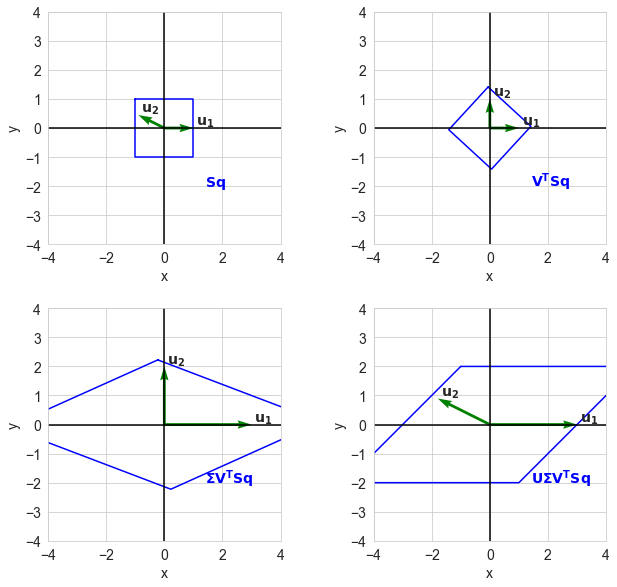

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4)

for i, axi in enumerate(ax.flatten()):
    axi.plot(Sqn[i][0,:], Sqn[i][1,:], color='b')
    axi.quiver(*origin, Un[i][0,:], Un[i][1,:], color=['g'],
               width=0.012, angles='xy', scale_units='xy', scale=1)
    axi.set_xlabel('x')
    axi.set_ylabel('y')
    axi.set_xlim([-4, 4])
    axi.set_ylim([-4, 4])
    axi.set_aspect('equal')
    axi.grid(True)
    # axi.set_title("Original vectors")
    axi.axhline(y=0, color='k')
    axi.axvline(x=0, color='k')
    axi.text(*(Un[i].T[0]+[.1,.1]), "$\mathbf{u_1}$")
    axi.text(*(Un[i].T[1]+[.1,.1]), "$\mathbf{u_2}$")
    axi.text(1.4, -2, Sqn_str[i], color='b')

### Сингулярное разложение ###

In [27]:
U, sgm, Vt = LA.svd(C)

print('sigma = ')
np.disp(sgm)
print('U = ')
np.disp(U)
print('Vt = ')
np.disp(Vt)

sigma = 
[3.81061639 1.57454841]
U = 
[[ 0.9347217  -0.35538056]
 [ 0.35538056  0.9347217 ]]
Vt = 
[[ 0.73588229  0.67710949]
 [-0.67710949  0.73588229]]


In [28]:
Sq1 = Vt @ Sq
Sq2 = np.diag(sgm) @ Sq1
Sq3 = U @ Sq2
Sqn = [Sq, Sq1, Sq2, Sq3]
Sqn_str = ["$\mathbf{Sq}$", "$\mathbf{V^TSq}$",
          "$\mathbf{\Sigma V^T Sq}$", "$\mathbf{U \Sigma V^T Sq}$"]

V = Vt.T
V1 = Vt @ V
V2 = np.diag(sgm) @ V1
V3 = U @ V2
Vn = [V, V1, V2, V3]

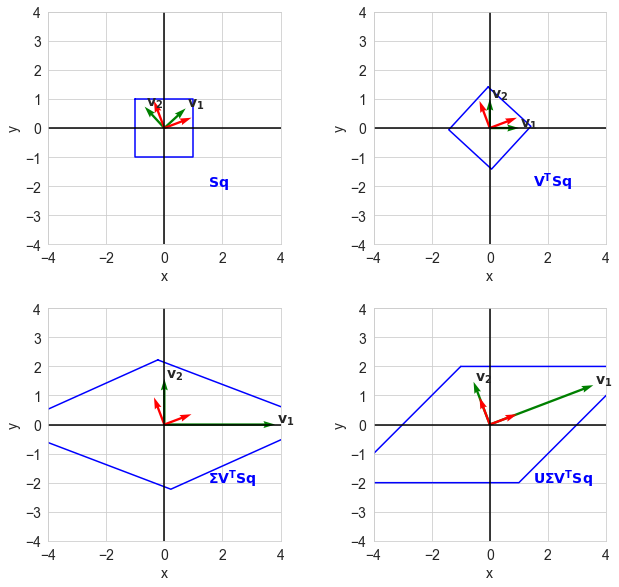

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4)

for i, axi in enumerate(ax.flatten()):
    axi.plot(Sqn[i][0,:], Sqn[i][1,:], color='b')
    axi.quiver(*origin, Vn[i][0,:], Vn[i][1,:], color=['g'],
               width=0.01, angles='xy', scale_units='xy', scale=1)
    axi.quiver(*origin, U[0,:], U[1,:], color=['r'],
               width=0.01, angles='xy', scale_units='xy', scale=1)
    axi.set_xlabel('x')
    axi.set_ylabel('y')
    axi.set_xlim([-4, 4])
    axi.set_ylim([-4, 4])
    axi.set_aspect('equal')
    axi.grid(True)
    # axi.set_title("Original vectors")
    axi.axhline(y=0, color='k')
    axi.axvline(x=0, color='k')
    axi.text(*(Vn[i].T[0]+[.05,.05]), "$\mathbf{v_1}$")
    axi.text(*(Vn[i].T[1]+[.05,.05]), "$\mathbf{v_2}$")
    axi.text(1.5, -2, Sqn_str[i], color='b')

---

## Малоранговые аппроксимации матриц ##

В некоторых практических задачах требуется приближать заданную матрицу $A$ некоторой другой матрицей $A_k$ с заранее заданным рангом $k$.

Возникает вопрос, в каком смысле приближать?
Ответ: в смысле нормы.

### Нормы векторов ###

Во многих задачах, связанных с линейными пространствами, возникает необходимость сравнивать между собой элементы пространства, например, иметь возможность сказать, что один вектор в каком-то смысле мал по сравнению с другими.
Если пространство евклидово, естественно сравнивать векторы по длине.
Можно ввести скалярное произведение в пространство специально с этой целью, но часто природа объектов, составляющих пространство, такова, что нет никакого естественно связанного с ней скалярного произведения.
Кроме того, скалярное произведение как таковое может быть и ненужным, нужен только какой-то аналог длины вектора &mdash; числовая функция от вектора, обладающая несколькими важными свойствами.

**Определение.** *Нормой вектора* $\mathbf{x}$ называется вещественное число $\|\mathbf{x}\|$, удовлетворяющее следующим условиям:

1. $\|\mathbf{x}\| \ge 0$, причём $\|\mathbf{x}\| = 0$ только при $\mathbf{x} = 0$;
1. $\forall \alpha \in \mathbb{R}$: $\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|$;
1. $\|\mathbf{x} + \mathbf{y}\| \le \|\mathbf{x}\| + \|\mathbf{y}\|$ (выпуклость).

Линейное пространство, в котором задана норма, называется *нормированным*.

>В нормированном пространстве мы можем определить *расстояние* между векторами $\mathbf{x}$ и $\mathbf{y}$ как норму их разности  $\|\mathbf{y} - \mathbf{x}\|$.
Множество векторов нормированного пространства, расстояние от которых до некоторого вектора $\mathbf{a}$ не превосходит заданного числа $\varepsilon$, называется $\varepsilon$-*окрестностью* вектора $\mathbf{a}$.
Используя понятие окрестности, можно определить предел последовательности векторов нормированного пространства.
Таким образом, возникает возможность перенести на нормированные пространства в том или ином виде все понятия элементарного математического анализа.
Так возникают функциональные пространства и функциональный анализ.

**Примеры норм:**

1. Норма $L_1$ (*октаэдрическая*):
$\|\mathbf{x}\|_1 = \sum\limits_i |x_i|$;

1. Норма $L_2$ (*евклидова*):
$\|\mathbf{x}\|_2 = \left( \sum\limits_i |x_i|^2 \right)^{1/2}$;

1. Норма $L_p$ (норма *Гёльдера*):
$\|\mathbf{x}\|_p = \left( \sum\limits_i |x_i|^p \right)^{1/p}$, $p \ge 1$;

1. Норма $L_\infty$ (*кубическая*):
$\|\mathbf{x}\|_\infty = \max\limits_i |x_i|$.

**Определение.** Пусть концы отрезка принадлежат некоторому множеству. Множество, называется *выпуклыми*, если ему принадлежит и весь отрезок.

**Предложение.** Единичный шар любой нормы является выпуклым множеством.

Нарисуем единичные сферы в двумерном пространстве, соответствующие различным нормам. \
Сделаем несколько наблюдений:

1. Из рисунка становится ясным смысл названия октаэдрической и кубической норм.
1. При $p = 1$ норма Гёльдера переходит в октаэдрическую, а при $p \to \infty$ &mdash; в кубическую.
1. При $p < 1$ норма Гёльдера теряет свойство выпуклости и поэтому перестаёт быть нормой.

In [30]:
def x_t(t, r, p):
    return r * np.sign(np.cos(t)) * np.abs(np.cos(t))**(2/p)

def y_t(t, r, p):
    return r * np.sign(np.sin(t)) * np.abs(np.sin(t))**(2/p)

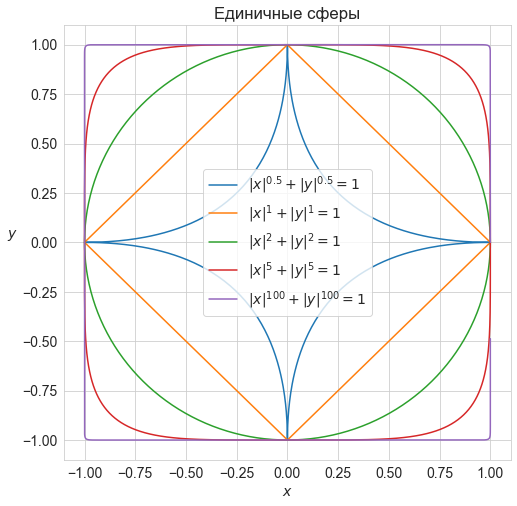

In [32]:
t = np.linspace(0, 2*np.pi, 501)
r = 1.

seaborn.set_style("whitegrid")
plt.figure(figsize=(8, 8))
plt.title('Единичные сферы')
for p in [0.5, 1, 2, 5, 100]:
    plt.plot(x_t(t, r, p), y_t(t, r, p), label=f'$|x|^{{{p}}} + |y|^{{{p}}} = 1$')

plt.xlabel(r"$x$")
plt.ylabel(r"$y$", rotation='horizontal', horizontalalignment='right')
plt.legend();

### Нормы матриц ###

<!-- **Определение.** Нормой матрицы $A$ называется вещественное число $\|A\|$, удовлетворяющее следующим условиям:

1. $\|A\| \ge 0$, причём $\|A\| = 0$ только при $A = 0$;
1. $\forall \alpha \in \mathbb{R}$: $\|\alpha A\| = |\alpha| \|A\|$;
1. $\|A + B\| \le \|A\| + \|B\|$;
1. $\|A B\| \le \|A\| \cdot \|B\|$ (субмультипликативная норма). -->

Рассмотрим линейное пространство $\mathbb{M}_{m, n}$ матриц размеров $m \times n$.
В нём, как и в любом линейном пространстве, могут быть введены различные нормы.

**Определение.**
Матричная норма $\|A\|$ называется *согласованной* с векторной норме $\|\mathbf{x}\|$, если 
$$ \|A \mathbf{x}\| \le \|A\| \cdot \|\mathbf{x}\|. $$

**Определение.**
Матричная норма $\|A\|$ называется *подчинённой* векторной нормой $\|\mathbf{x}\|$, если
$$ \|A\| \equiv \sup\limits_{\mathbf{x} \ne 0} \dfrac{\|A \mathbf{x}\|}{\|\mathbf{x}\|} = \sup\limits_{\|\mathbf{x}\| = 1} \|A \mathbf{x}\|. $$

В этом случае случае говорят также, что векторная норма *индуцирует* матричную норму.

**Предложение.**
Если норма $\|A\|$ подчинена какой-то векторной норме $\|\mathbf{x}\|$, то она с ней согласована.
Более того, существует вектор $\mathbf{x}_0$, на котором достигается точная верхняя грань:
$$ \|A \mathbf{x}_0\| = \|A\| \cdot \|\mathbf{x}_0\|. $$

**Примеры:**

1. Евклидова норма векторов индуцирует *спектральную норму* матриц
$$ \|A\|_2 = \max \dfrac{\|A \mathbf{x}\|_2}{\|\mathbf{x}\|_2} = \sigma_1, $$
где $\sigma_1$ &mdash; максимальное сингулярное число.

1. *Норма Фробениуса*:
$$ \|A\|_F = \left( \sum\limits_{i,j} |a_{ij}|^2 \right)^{1/2}. $$
Можно показать, что
$\|A\|_F = \sqrt{\mathrm{tr} (A^\top A)} = \sqrt{\sigma_1^2 + \ldots + \sigma_r^2}$.

1. Ядерная норма:
$\|A\|_N = \sigma_1 + \ldots + \sigma_r$.

### Теорема Эккарта &mdash; Янга ###

**Теорема.**
Наилучшая (в смысле нормы Фробениуса) матрица ранга $k$, соответствующая матрице $A$ является матрица $A_k = U \Sigma_k V^\top$.

>**Примечание.**
В 1955 году Мирский доказал, что подходит любая норма матрицы, если зависит только от сингулярных чисел.

Итак, для любой нормы из приведённых выше,

$$ \|A - B\| \ge \|A - A_k\|. $$

---

## Метод главных компонент ##

В методе главных компонент (principal component analysis, PCA) строится минимальное число новых признаков, по которым исходные признаки восстанавливаются линейным преобразованием с минимальными погрешностями.
PCA относится к методам обучения без учителя.

### Постановка задачи ###

Пусть дана матрица признаков $F_{m \times n}$.

Обозначим через $G_{m \times k}$ признаков тех же объектов в новом пространстве меньшей размерности $k < n$.

Потребуем, чтобы исходные признаки можно было восстановить по новым с помощью некоторого линейного преобразования, определяемого матрицей $V$:
$$ \hat{F} = G V^\top. $$

Восстановленное описание $\hat{F}$ не обязано в точности совпадать с исходным описанием $F$, но их отличие на объектах обучающей выборки должно быть как можно меньше при выбранной размерности $m$:
$$ \Delta^2(G, V) = \|G V^\top - F\|^2 \rightarrow \min_{G, V}. $$

**Теорема.**
Минимум $\Delta^2(G, V)$ достигается, когда столбцы матрицы $V$ есть собственные векторы $F^\top F$, соответствующие $k$ максимальным собственным значениям.
При этом $G = FV$, матрица $V$ ортогональна.

**Определение.**
Собственные векторы $\mathbf{v}_1, \ldots, \mathbf{v}_k$, отвечающие максимальным собственным значениям, называются *главными компонентами*.

### Связь с сингулярным разложением ###

Если $k = n$, то $\Delta^2(G, V) = 0$.
В этом случае представление $F = G V^\top$ является точным и совпадает с сингулярным разложением: $F = G V^\top = U \Sigma V^\top$.

Если $k < n$, то представление $F \approx G V^\top$ является приближённым.
Разложение матрицы $G V^\top$ получается из сингулярного разложения матрицы $F$ путём отбрасывания (обнуления) $n − k$ минимальных собственных значений.

Диагональность матрицы $G^\top G = \Lambda$ означает, что новые признаки $g_1, \ldots, g_k$ не коррелируют на обучающих объектах.
Поэтому ортогональное отображение $V$ называют *декоррелирующим* или отображением *Карунена &mdash; Лоэва*.

### Эффективная размерность ###

Главные компоненты содержат основную информацию о матрице $F$.
Число главных компонент $k$ называют также эффективной размерностью задачи.
На практике её определяют следующим образом.
Все сингулярные числа матрицы $F$ упорядочиваются по убыванию: $\sigma_1 > \ldots > \sigma_n > 0$.

Задаётся пороговое значение $\varepsilon \in [0, 1]$, достаточно близкое к нулю, и определяется
наименьшее целое $k$, при котором относительная погрешность приближения матрицы $F$ не превышает $\varepsilon$:

$$
  E(k) = \frac{\|G V^\top − F\|^2}{\|F\|^2} = \frac{\sigma_{k+1} + \ldots + \sigma_n}{\sigma_1 + \ldots + \sigma_n} \le \varepsilon.
$$

---

## Примеры ##

### Dimension reduction: аппроксимации изображений ###

Посмотрим на главные компоненты картин или фотографий.

In [12]:
# Reading the image
img = plt.imread("pix/7.SVD/Mona Lisa.png")
print(np.shape(img))

(640, 429)


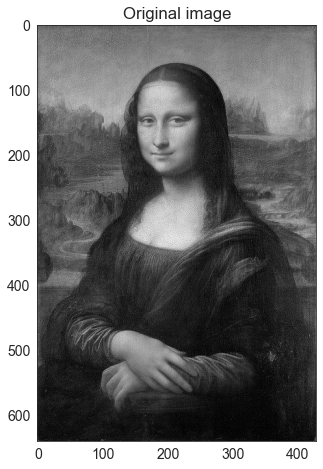

In [13]:
seaborn.set_style("white")
fig, axes = plt.subplots(1, 1, figsize=(5,10))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes.imshow(img, cmap='gray')
axes.set_title("Original image")

plt.show()

In [14]:
# SVD 
U, s, VT = LA.svd(img)
print(np.shape(s))

S_s = sum(s)
eds = list(map(lambda i: sum(s[i:]) / S_s, range(len(s))))

(429,)


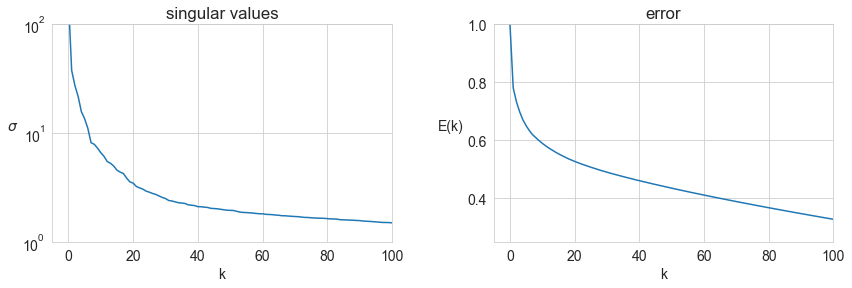

In [15]:
seaborn.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(s)
ax1.set_title('singular values')
ax1.set_yscale('log')
ax1.set_xlim(-5, 100)
ax1.set_ylim(10e-1, 1e2)
ax1.set_xlabel('k')
ax1.set_ylabel('$\sigma$', rotation='horizontal', ha='right')

ax2.plot(eds)
ax2.set_title('error')
ax2.set_xlim(-5, 100)
ax2.set_ylim(0.25, 1.0)
ax2.set_xlabel('k')
ax2.set_ylabel('E(k)', rotation='horizontal', ha='right')

plt.show()

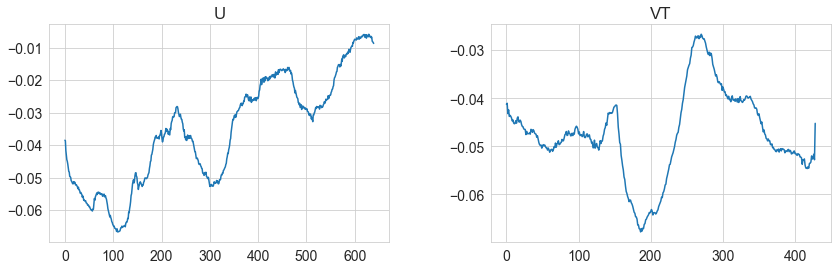

In [16]:
seaborn.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(U[:, :1])
ax1.set_title("U")

ax2.plot(VT[:1, :].T)
ax2.set_title("VT")

plt.show()

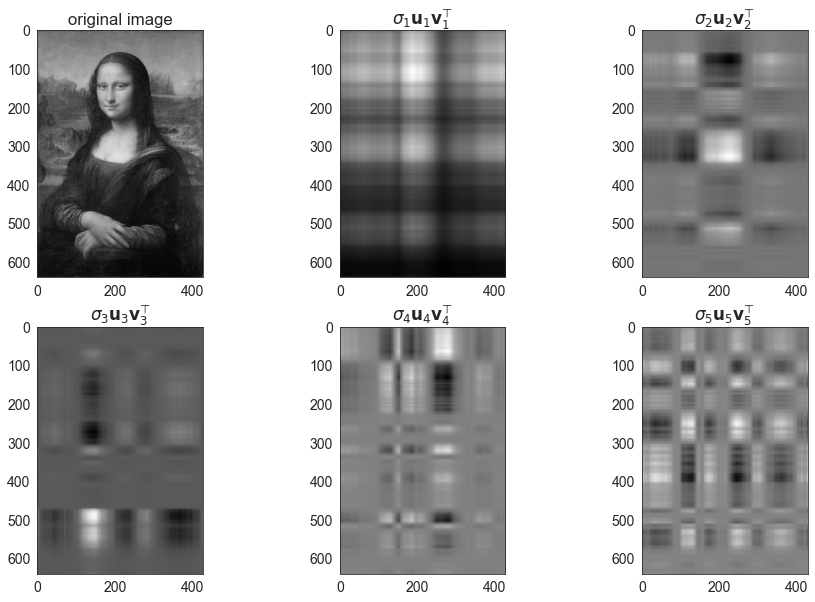

In [17]:
seaborn.set_style("white")
fig, axes = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("original image")
k = 5
for i in range(k):
    img_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[(i+1) // 3, (i+1) % 3].imshow(img_i, cmap='gray')
    axes[(i+1) // 3, (i+1) % 3].set_title(
        f"$\sigma_{i+1} \mathbf{{u}}_{i+1} \mathbf{{v}}_{i+1}^\\top$")
    
plt.show()

In [18]:
Sigma = np.zeros((img.shape[0], img.shape[1]))
Sigma[:min(img.shape[0], img.shape[1]), :min(img.shape[0], img.shape[1])] = np.diag(s)

# Reconstruction of the matrix using the first k singular values
img_k = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

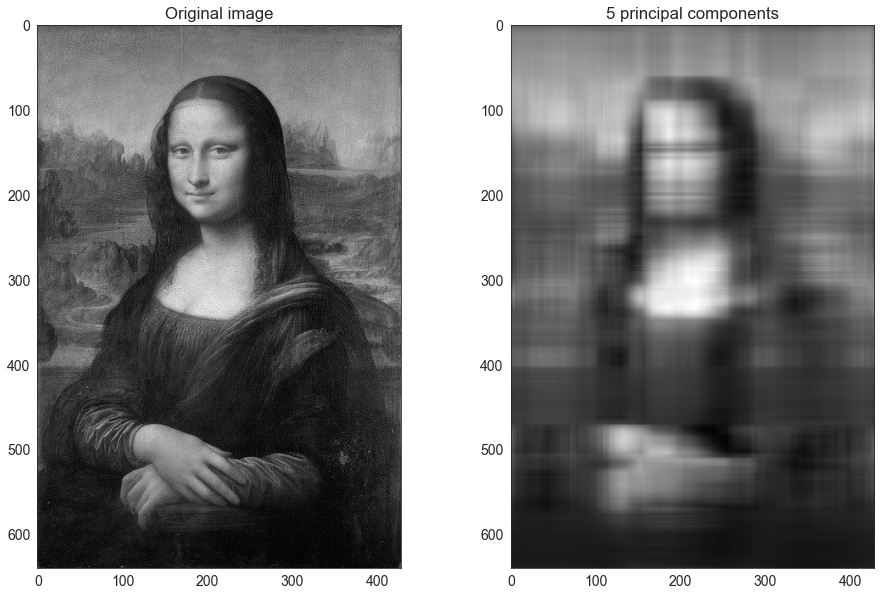

In [19]:
seaborn.set_style("white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(img, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(img_k, cmap='gray')
ax2.set_title(f"{k} principal components")
plt.show()

---

## Источники ##

1. *Strang G.* Linear algebra and learning from data. &mdash; Wellesley-Cambridge Press, 2019. &mdash; 432 p.
1. *Беклемишев Д.В.* Дополнительные главы линейной алгебры. &mdash; М.: Наука, 1983. &mdash; 336 с.
1. *Воронцов К.В.* [Математические методы обучения по прецедентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). &mdash; 141 c.
1. [Материалы](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d) автора [Reza Bagheri](https://medium.com/@reza.bagheri79).

In [20]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))
# print('scipy: {}'.format(sp.__version__))

Python: 3.7.7
numpy: 1.18.1
matplotlib: 3.2.1
seaborn: 0.10.1
